In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine
import json

#### Configuración de tema matplotlib

In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
pd.set_option('display.max_columns', None)

#### Conexión a base de datos

In [3]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}")

### Consultas a base de datos

In [4]:
start_date = '2024-12-01 00:00:00'
end_date = '2025-12-31 23:59:59'

In [5]:
sql_transactions = f'''

SELECT 
    bikeAccountNumber,
    initializationDateTime,
    processingDateTime,
    completionDateTime,
    merchantTxId,
    amount,
    authorizationNumber,
    paymentType_id,
    paymentBusinessContext_id,
    paymentMode_id,
    paymentResult_id,
    paymentResultReason_id,
    paymentSourceType_id,
    bikeAccountType_id,
    creditCardType_id,
    creditCardId,
    cardBin,
    cardBinBrand,
    cardBinCountry,
    cardBinSubType,
    cardBinType,
    cardBinResult_id,
    reasonCode
FROM BikePaymentFact
WHERE 
	creationDateTime BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_transactions = pd.read_sql(sql_transactions, engine)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238.0,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914.0,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [6]:
sql_PaymentTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentTypeDim

'''

df_sql_PaymentTypeDim = pd.read_sql(sql_PaymentTypeDim, engine)

df_sql_PaymentTypeDim.head()

,id,localizedValue0
0,0,Purchase
1,1,Pre-authorization
2,2,Completion
3,3,Refund
4,4,Refund (ind.)


In [7]:
sql_PaymentBusinessContextDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentBusinessContextDim

'''

df_sql_PaymentBusinessContextDim = pd.read_sql(sql_PaymentBusinessContextDim, engine)
df_sql_PaymentBusinessContextDim.head()

,id,localizedValue0
0,0,-
1,2000,Bike
2,2001,Migrated Payments
3,2002,Bike // Credit card validation
4,2003,Bike // Processing credit card validation pre-...


In [8]:
sql_PaymentModeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentModeDim

'''

df_sql_PaymentModeDim = pd.read_sql(sql_PaymentModeDim, engine)
df_sql_PaymentModeDim.head()

,id,localizedValue0
0,4798412,External
1,5646456,Cash
2,6565426,Electronic
3,6565653,Credit card
4,8308550,Mobile


In [9]:
sql_PaymentResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultDim

'''

df_sql_PaymentResultDim = pd.read_sql(sql_PaymentResultDim, engine)
df_sql_PaymentResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Accepted
2,2,Refused
3,3,Incomplete
4,4,Cancelled


In [10]:
sql_PaymentResultReasonDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultReasonDim

'''

df_sql_PaymentResultReasonDim = pd.read_sql(sql_PaymentResultReasonDim, engine)
df_sql_PaymentResultReasonDim.head()

,id,localizedValue0
0,23423,See response code
1,75445,Credit card expired
2,88923,View error code
3,104583,AVS mismatch
4,159489,Credit card deleted error


In [11]:
sql_PaymentSourceTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentSourceTypeDim

'''

df_sql_PaymentSourceTypeDim = pd.read_sql(sql_PaymentSourceTypeDim, engine)
df_sql_PaymentSourceTypeDim.head()

,id,localizedValue0
0,1,Backend payment source
1,2,Console payment source
2,3,PED
3,10,Test payment source
4,30,Bike web service payment source


In [12]:
sql_BikeAccountTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM BikeAccountTypeDim

'''

df_sql_BikeAccountTypeDim = pd.read_sql(sql_BikeAccountTypeDim, engine)
df_sql_BikeAccountTypeDim.head()

,id,localizedValue0
0,-128,Unknown
1,1,Member
2,2,Casual


In [13]:
sql_CreditCardTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_CreditCardTypeDim = pd.read_sql(sql_CreditCardTypeDim, engine)
df_sql_CreditCardTypeDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


In [14]:
sql_PaymentCreditCardBinResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_PaymentCreditCardBinResultDim = pd.read_sql(sql_PaymentCreditCardBinResultDim, engine)
df_sql_PaymentCreditCardBinResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


### Transformaciones

In [15]:
# convertir cardBin a entero sin decimales
df_sql_transactions['cardBin'] = pd.to_numeric(df_sql_transactions['cardBin'], errors='coerce').fillna(0).astype(int)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [16]:
# importar CSV
csv_file_path = '../data/Bin_ECOBICI.csv'
df_bines = pd.read_csv(csv_file_path, encoding='utf-8')
df_bines.head(1)

,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,202022,6,COMPLETO,110030,BAJIO,PRESTAMOS ABCD,ABCD,CRÃDITO,PRIVADA


In [17]:
# Agregar datos de df_bines a df_sql_transactions
df_merged = pd.merge(df_sql_transactions, df_bines, how='left', left_on='cardBin', right_on='BIN')
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


In [18]:
# Formatos de fecha
df_merged['initializationDateTime'] = pd.to_datetime(df_merged['initializationDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['processingDateTime'] = pd.to_datetime(df_merged['processingDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['completionDateTime'] = pd.to_datetime(df_merged['completionDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged.head(1)


,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


#### PaymentTypeDim
Contains information pertaining to the type of transaction.

In [19]:
df_merged['tipo_pago'] = df_merged.merge(df_sql_PaymentTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal


#### PaymentBusinessContextDim
Contains information pertaining to the business context of the payment.

In [20]:
df_merged['contexto_negocio_pago'] = df_merged.merge(df_sql_PaymentBusinessContextDim[['id', 'localizedValue0']], how='left', left_on='paymentBusinessContext_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...


#### PaymentModeDim
Contains information pertaining to the payment means

In [21]:
df_merged['modo_pago'] = df_merged.merge(df_sql_PaymentModeDim[['id', 'localizedValue0']], how='left', left_on='paymentMode_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card


#### PaymentResultDim
Contains the result of a payment

In [22]:
df_merged['resultado_pago'] = df_merged.merge(df_sql_PaymentResultDim[['id', 'localizedValue0']], how='left', left_on='paymentResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted


#### PaymentResultReasonDim
Contains the result reason of a payment.

In [23]:
df_merged['razon_rechazo_pago'] = df_merged.merge(df_sql_PaymentResultReasonDim[['id', 'localizedValue0']], how='left', left_on='paymentResultReason_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None


#### PaymentSourceTypeDim
Contains the type of the payment source.

In [24]:
df_merged['fuente_pago'] = df_merged.merge(df_sql_PaymentSourceTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source


#### BikeAccountTypeDim
Contains information pertaining to types of bike accounts.

In [25]:
df_merged['tipo_de_ciclista'] = df_merged.merge(df_sql_BikeAccountTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member


#### CreditCardTypeDim
Contains information pertaining to types of credit cards

In [26]:
df_merged['tipo_de_tarjeta'] = df_merged.merge(df_sql_CreditCardTypeDim[['id', 'localizedValue0']], how='left', left_on='creditCardType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard


#### PaymentCreditCardBinResultDim
Contains the result information pertaining to the credit card BIN (bank identification number). The BIN corresponds to the first 6 digits
of the credit card number.

In [27]:
df_merged['resultado_tarjeta_credito'] = df_merged.merge(df_sql_PaymentCreditCardBinResultDim[['id', 'localizedValue0']], how='left', left_on='cardBinResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [28]:
# Renombrar columnas
df_merged.rename(columns={
    'bikeAccountNumber': 'numero_cuenta_bici',
    'initializationDateTime': 'fecha_hora_inicializacion',
    'processingDateTime': 'fecha_hora_procesamiento',
    'completionDateTime': 'fecha_hora_completacion',
    'merchantTxId': 'id_transaccion_comerciante',
    'amount': 'monto',
    'authorizationNumber': 'numero_autorizacion',
    'creditCardId': 'id_tarjeta_credito',
    'cardBin': 'bin_tarjeta',
    'cardBinBrand': 'marca_bin',
    'cardBinCountry': 'pais_bin',
    'cardBinSubType': 'subtipo_bin',
    'cardBinType': 'tipo_tarjeta',
    'cardBinResult_id': 'id_resultado_bin',
    'reasonCode': 'codigo_razon'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,id_tarjeta_credito,bin_tarjeta,marca_bin,pais_bin,subtipo_bin,tipo_tarjeta,id_resultado_bin,codigo_razon,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [29]:
# Eliminar columnas innecesarias
columns_to_drop = [
    'paymentType_id',
    'paymentBusinessContext_id',
    'paymentMode_id',
    'paymentResult_id',
    'paymentResultReason_id',
    'paymentSourceType_id',
    'bikeAccountType_id',
    'creditCardType_id',
    'marca_bin',
    'BIN',
    'marca_bin',
    'NATURALEZA',
    'id_resultado_bin',
    'MARCA'
]
df_merged.drop(columns=columns_to_drop, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [30]:
# renombrar columnas
df_merged.rename(columns={
    'LONGITUD': 'longitud_bin',
    'RANGO': 'rango_bin',
    'INSTITUCIÃN': 'institucion_bin',
    'ID INSTITUCIÃN': 'id_institucion_bin',
    'PRODUCTO': 'producto_bin',
    'NOMBRE CORTO': 'nombre_corto_bin'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [31]:
# Crear columna pago_exitoso donde codigo_razon es vacio es pago exitoso
df_merged['pago_exitoso'] = np.where(df_merged['codigo_razon'].isnull() | (df_merged['codigo_razon'] == ''), 'Exitoso', 'Fallido')
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso


In [32]:
# Extraer semana de pago de fecha_hora_inicializacion
# Extraer año de pago de fecha_hora_inicializacion
df_merged['numero_semana'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().week
df_merged['numero_ano'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().year

df_merged['numero_semana_ano'] = df_merged['numero_semana'].astype(str) + '-' + df_merged['numero_ano'].astype(str)
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024


In [33]:
df_merged['numero_semana_ano'].unique()

array(['48-2024', '49-2024', '<NA>-<NA>', '50-2024', '51-2024', '52-2024',
       '1-2025', '2-2025', '3-2025', '4-2025', '5-2025', '6-2025',
       '7-2025', '8-2025', '9-2025', '10-2025', '11-2025', '12-2025',
       '13-2025', '14-2025', '15-2025', '16-2025', '17-2025', '18-2025',
       '19-2025', '20-2025', '21-2025', '22-2025', '23-2025', '24-2025',
       '25-2025', '26-2025', '27-2025', '28-2025', '29-2025', '30-2025',
       '31-2025', '32-2025', '33-2025', '34-2025', '35-2025', '36-2025',
       '37-2025', '38-2025', '39-2025', '40-2025', '41-2025', '42-2025',
       '43-2025', '44-2025', '45-2025', '46-2025'], dtype=object)

In [34]:
# filtrar donde numero_semana_ano es 
df_filtered_not_na = df_merged[df_merged['numero_semana_ano'] != '<NA>-<NA>']
df_filtered_not_na

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532960,53AHZ2F2,2025-11-16 11:25:42.492000-06:00,2025-11-16 11:25:43.010000-06:00,2025-11-16 11:25:43.010000-06:00,cyb_cnp0008034816,540100,None,e9977902-b407-4040-8a7f-9d51a9245c29,481516,MEX,None,CREDIT,DECISION_PROFILE_REJECT,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Update credit card - Process balance,Credit card,Refused,None,Bike web service payment source,NaN,Visa,Unknown,Fallido,46,2025,46-2025
1532961,RDDXFG5S,2025-11-16 11:25:42.676000-06:00,2025-11-16 11:25:43.676000-06:00,2025-11-16 11:25:43.676000-06:00,cyb_cnp0008034817,10000,None,130d353e-40f8-435c-8e7a-adf6d0c7eff8,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization,Bike // Credit card validation,Credit card,Accepted,None,Bike web service payment source,NaN,Visa,Unknown,Exitoso,46,2025,46-2025
1532962,WRWR6W8N,2025-11-16 11:25:48.239000-06:00,2025-11-16 11:25:48.239000-06:00,2025-11-16 11:25:48.239000-06:00,None,1279900,None,c934a5c3-5e2f-4635-b5bb-a56c2f241a87,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Purchase,Bike // Member subscription purchase,Credit card,Refused,

### Visualizaciones

#### Por monto o tipo de plan: Histograma por monto	

In [35]:
# agregar columna monto real que es monto/10000
df_merged['monto_real'] = df_merged.apply(lambda row: row['monto']/10000 if row['pago_exitoso'] else 0, axis=1)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0


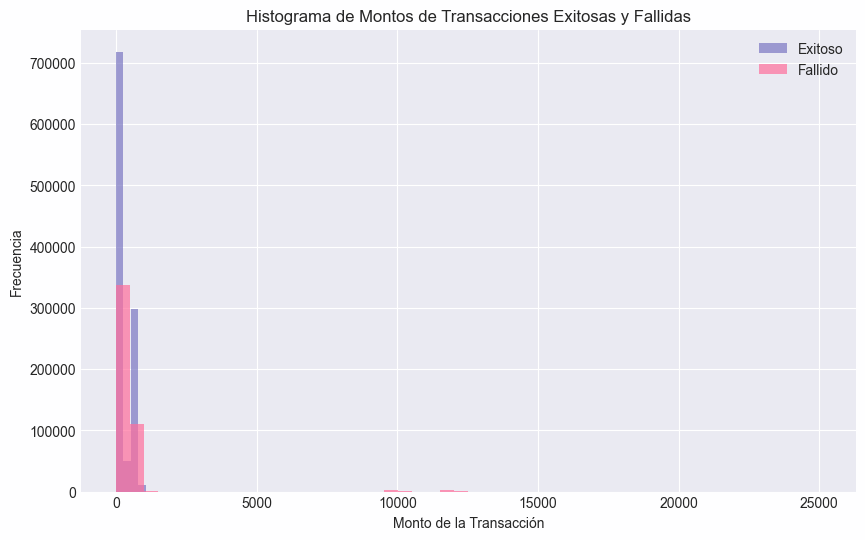

In [36]:
# Higrama de montos de transacciones exitosas y fallidas
df_successful_payments = df_merged[df_merged['pago_exitoso'] == 'Exitoso']
df_failed_payments = df_merged[df_merged['pago_exitoso'] == 'Fallido']

plt.figure(figsize=(10, 6))
plt.hist(df_successful_payments['monto_real'], bins=50, alpha=0.7, label='Exitoso')
plt.hist(df_failed_payments['monto_real'], bins=50, alpha=0.7, label='Fallido')
plt.title('Histograma de Montos de Transacciones Exitosas y Fallidas')
plt.xlabel('Monto de la Transacción')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


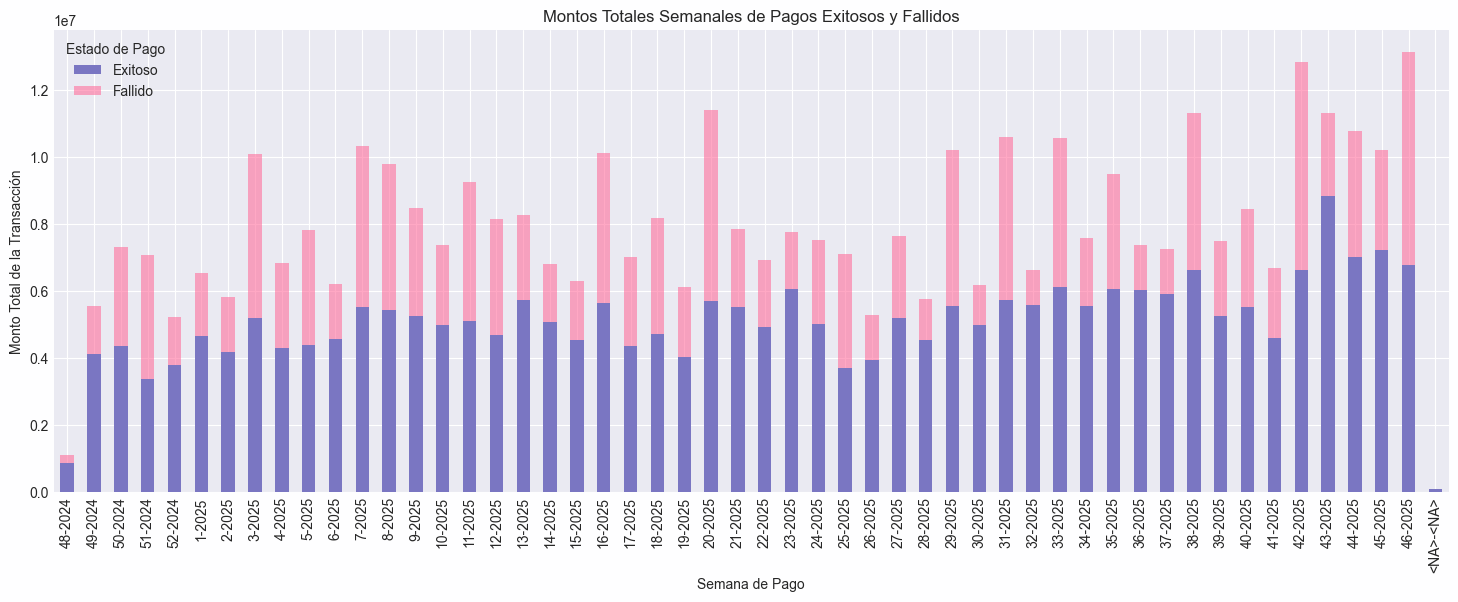

In [37]:
# grafica de barraras  de montos totales por semana y estado de pago
amount_summary = df_merged.groupby(['numero_semana_ano', 'pago_exitoso'])['monto_real'].sum().unstack(fill_value=0)

def sort_week_year(index_value):
    try:
        # Separa la semana y el año
        parts = index_value.split('-')
        
        # Verifica que sean valores numéricos válidos
        if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
            week = int(parts[0])
            year = int(parts[1])
            # La tupla (año, semana) garantiza el orden cronológico
            return (year, week)
        else:
            # Coloca los valores no estándar o '<NA>' al final de la lista
            return (9999, 99)
    except:
        return (9999, 99)

# 3. Ordenar el DataFrame usando la clave personalizada
# Utilizamos la función 'sort_week_year' para ordenar los elementos del índice

amount_summary_sorted = amount_summary.loc[
    sorted(amount_summary.index, key=sort_week_year)
]
amount_summary_sorted.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.title('Montos Totales Semanales de Pagos Exitosos y Fallidos')
plt.xlabel('Semana de Pago')
plt.ylabel('Monto Total de la Transacción')
plt.legend(title='Estado de Pago')
plt.show()


In [38]:
# nemro de fallidos y exitosos en la semana 48-2024
df_week_48_2024 = df_merged[df_merged['numero_semana_ano'] == '20-2025']
payment_summary_week_48_2024 = df_week_48_2024['pago_exitoso'].value_counts()
payment_summary_week_48_2024

pago_exitoso
Exitoso    26104
Fallido    23403
Name: count, dtype: int64

In [39]:
# montos fallildos y exitosos en la semana 48-2024
df_week_48_2024 = df_merged[df_merged['numero_semana_ano'] == '20-2025']
amount_summary_week_48_2024 = df_week_48_2024.groupby('pago_exitoso')['monto_real'].sum()
amount_summary_week_48_2024

pago_exitoso
Exitoso    5690953.18
Fallido    5716554.09
Name: monto_real, dtype: float64

In [40]:
print("El monto maximo es", df_merged['monto_real'].max())
print("El monto minimo es", df_merged['monto_real'].min())
print("El monto promedio es", df_merged['monto_real'].mean())
df_merged["monto_real"].describe()

El monto maximo es 25049.96
El monto minimo es 0.0
El monto promedio es 268.33211141154555


count    1.532965e+06
mean     2.683321e+02
std      6.885809e+02
min      0.000000e+00
25%      2.700000e+01
50%      1.279900e+02
75%      5.450000e+02
max      2.504996e+04
Name: monto_real, dtype: float64

In [41]:
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024,0.0
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024,0.0
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024,0.0


C:\Users\victor.briones\AppData\Local\Temp\ipykernel_17948\2491529859.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rango_payment_summary = df_merged.groupby(['rango_monto_real', 'pago_exitoso']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

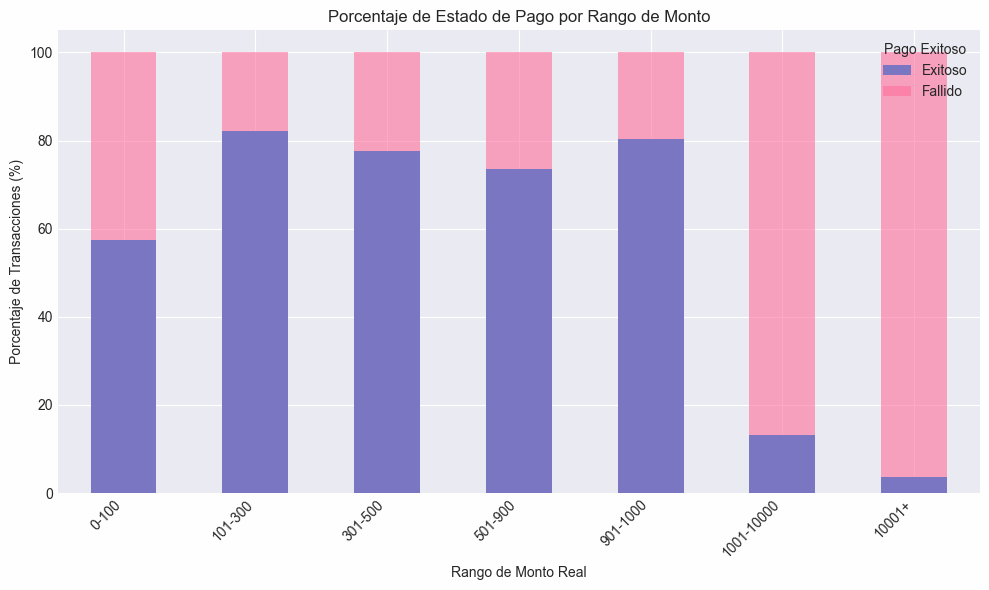

In [42]:
# Crear rangos de monto_real
bins = [0, 100, 300, 500, 900, 1000, 10000, np.inf]
labels = ['0-100', '101-300', '301-500', '501-900', '901-1000', '1001-10000', '10001+']
df_merged['rango_monto_real'] = pd.cut(df_merged['monto_real'], bins=bins, labels=labels, right=False)
df_merged.head()

# 1. Calcular el conteo de rangos de monto real por estado de pago
rango_payment_summary = df_merged.groupby(['rango_monto_real', 'pago_exitoso']).size().unstack(fill_value=0)

# 2. Calcular las proporciones (Porcentajes) para el gráfico 100% apilado
# Sumar a lo largo de las filas (axis=1) para obtener el total de transacciones por rango
row_totals = rango_payment_summary.sum(axis=1)

# Dividir cada celda por su total de fila correspondiente y multiplicar por 100
rango_payment_summary_100 = rango_payment_summary.div(row_totals, axis=0) * 100

# 3. Graficar la tabla de porcentajes
plt.figure(figsize=(10, 6))
rango_payment_summary_100.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Porcentaje de Estado de Pago por Rango de Monto')
plt.xlabel('Rango de Monto Real')
plt.ylabel('Porcentaje de Transacciones (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pago Exitoso')
plt.tight_layout()
plt.show()

In [43]:
rango_payment_summary

pago_exitoso,Exitoso,Fallido
rango_monto_real,,
0-100,319582,236819
101-300,400312,87514
301-500,47402,13614
501-900,302866,109336
901-1000,7380,1812
1001-10000,141,920
10001+,191,5076


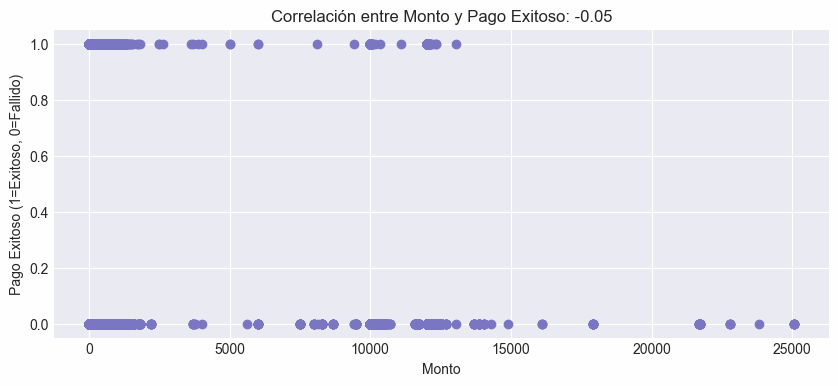

La correlación entre monto_real y pago_exitoso es: -0.05293986351182369


In [44]:
x = df_merged["monto_real"].values
y = df_merged["pago_exitoso"].map({'Exitoso': 1, 'Fallido': 0}).values
correlation = np.corrcoef(x, y)[0, 1]

plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.title(f'Correlación entre Monto y Pago Exitoso: {correlation:.2f}')
plt.xlabel('Monto')
plt.ylabel('Pago Exitoso (1=Exitoso, 0=Fallido)')
plt.grid(True)
plt.show()

print("La correlación entre monto_real y pago_exitoso es:", correlation)

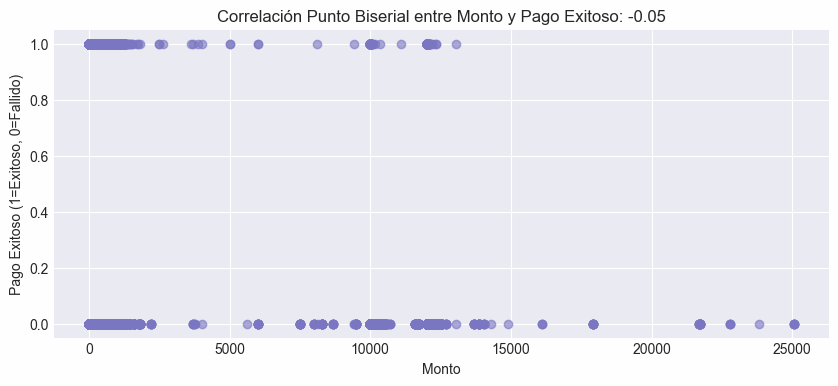

La correlación punto biserial entre monto_real y pago_exitoso es: -0.0529
Valor p: 0.0000


In [47]:
# Preparar los datos
x = df_merged["monto_real"].values
y = df_merged["pago_exitoso"].map({'Exitoso': 1, 'Fallido': 0}).values

# Calcular correlación punto biserial
# Es equivalente a la correlación de Pearson entre una variable continua y una dicotómica
correlation, p_value = stats.pearsonr(x, y)

# También puedes calcularla manualmente para verificar:
# group_1 = x[y == 1]  # Montos para pagos exitosos
# group_0 = x[y == 0]  # Montos para pagos fallidos
# correlation = (group_1.mean() - group_0.mean()) * np.sqrt(len(group_1) * len(group_0) / (len(x)**2)) / x.std()

plt.figure(figsize=(10, 4))
plt.scatter(x, y, alpha=0.6)
plt.title(f'Correlación Punto Biserial entre Monto y Pago Exitoso: {correlation:.2f}')
plt.xlabel('Monto')
plt.ylabel('Pago Exitoso (1=Exitoso, 0=Fallido)')
plt.grid(True)
plt.show()

print(f"La correlación punto biserial entre monto_real y pago_exitoso es: {correlation:.4f}")
print(f"Valor p: {p_value:.4f}")

#### 